In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from konlpy.tag import Kkma,Twitter
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import csv
from tqdm import tqdm

In [10]:
d = pd.read_excel('test_all_preprocessed.xlsx',sheet_name='sheet1')

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19238 entries, 0 to 19237
Data columns (total 14 columns):
연월      19238 non-null int64
전시제목    19238 non-null object
링크      19238 non-null object
전시작가    19238 non-null object
전시일정    19238 non-null object
초대일시    15640 non-null object
관람시간    19238 non-null object
전시장소    19238 non-null object
주소      19238 non-null object
연락처     19238 non-null object
홈페이지    16096 non-null object
아티클     19238 non-null object
텍스트     19238 non-null object
이미지     19238 non-null object
dtypes: int64(1), object(13)
memory usage: 2.2+ MB


In [4]:
d.dropna(subset=['텍스트'],inplace=True) #텍스트 없는 로우 드랍

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19238 entries, 0 to 19237
Data columns (total 14 columns):
연월      19238 non-null int64
전시제목    19238 non-null object
링크      19238 non-null object
전시작가    19238 non-null object
전시일정    19238 non-null object
초대일시    15640 non-null object
관람시간    19238 non-null object
전시장소    19238 non-null object
주소      19238 non-null object
연락처     19238 non-null object
홈페이지    16096 non-null object
아티클     19238 non-null object
텍스트     19238 non-null object
이미지     19238 non-null object
dtypes: int64(1), object(13)
memory usage: 2.2+ MB


In [6]:
sum(d.duplicated(subset=['텍스트'])) # 중복된 텍스트 수 

136

In [19]:
toDropIndex = d[d.duplicated(subset=['텍스트'])].index

In [20]:
d.drop(index = toDropIndex, inplace=True)

In [21]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19102 entries, 0 to 19237
Data columns (total 14 columns):
연월      19102 non-null int64
전시제목    19102 non-null object
링크      19102 non-null object
전시작가    19102 non-null object
전시일정    19102 non-null object
초대일시    15527 non-null object
관람시간    19102 non-null object
전시장소    19102 non-null object
주소      19102 non-null object
연락처     19102 non-null object
홈페이지    16001 non-null object
아티클     19102 non-null object
텍스트     19102 non-null object
이미지     19102 non-null object
dtypes: int64(1), object(13)
memory usage: 2.2+ MB


In [8]:
toDropIndex = d[d.duplicated(subset=['전시제목','전시일정'])].index #그래도 같은 전시는 drop

In [9]:
d.drop(index = toDropIndex, inplace=True)

In [10]:
d.info() # 19099 개 데이터

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19099 entries, 0 to 19237
Data columns (total 14 columns):
연월      19099 non-null int64
전시제목    19099 non-null object
링크      19099 non-null object
전시작가    19099 non-null object
전시일정    19099 non-null object
초대일시    15524 non-null object
관람시간    19099 non-null object
전시장소    19099 non-null object
주소      19099 non-null object
연락처     19099 non-null object
홈페이지    15998 non-null object
아티클     19099 non-null object
텍스트     19099 non-null object
이미지     19099 non-null object
dtypes: int64(1), object(13)
memory usage: 2.2+ MB


In [11]:
d19099 = d.reset_index(drop=True)

In [12]:
d19099.to_excel('d19099.xlsx')

In [6]:
# kkma = Kkma()
twitter = Twitter()

In [16]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [17]:
tokens = []
for txt in tqdm(d.텍스트):
    if txt==None:
        continue
    tokens.append(twitter.morphs(txt)) #morphs 를 가져오자

100%|████████████████████████████████████████████████████████████████████████████| 19099/19099 [09:55<00:00, 32.07it/s]


In [15]:
nouns = []
for txt in tqdm(d.텍스트):
    try:
        nouns.append(twitter.nouns(txt)) #nouns 만 가져오자
    except Exception as e:
        continue

100%|████████████████████████████████████████████████████████████████████████████| 19099/19099 [10:46<00:00, 29.54it/s]


In [37]:
# ads = []
# for txt in d.텍스트:
#     ads.append([tag[0] for tag in twitter.pos(txt) if tag[1] in ['Adjective','Adverb','Verb']])

In [16]:
ad_nouns = []
for txt in tqdm(d.텍스트):
    ad_nouns.append([tag[0] for tag in twitter.pos(txt) if tag[1] in ['Noun','Adjective','Adverb','Verb']])

100%|████████████████████████████████████████████████████████████████████████████| 19099/19099 [10:31<00:00, 30.24it/s]


In [21]:
len(ad_nouns)#doc 갯수

19099

#### 모든 tokens

In [28]:
# with open('artMorphs_final.dat','wb') as file: #pickle로 저장
#     pickle.dump(tokens,file)

In [29]:
with open('artMorphs_final.dat','rb') as file: # load
    tokens = pickle.load(file)

In [20]:
plt.rcParams['font.family'] = 'NanumSquare' #그래프 위한 폰트설정

In [31]:
tokens_all = []
for doc in tokens:
    tokens_all += doc

In [32]:
len(tokens_all) #13351207  tokens

13351207

In [23]:
toeken_all_count = Counter(tokens_all)

In [24]:
sorted_toeken_all_count = sorted(toeken_all_count.items(), key = lambda kv:kv[1],reverse=True) # 출현빈도수로 정렬해보자

In [25]:
sorted_toeken_all_count[:20]

[('의', 539744),
 ('.', 468231),
 ('을', 449109),
 (',', 295079),
 ('이', 263944),
 ('다', 257050),
 ('에', 232687),
 ('은', 200791),
 ('를', 198674),
 ('적', 180841),
 ('는', 177701),
 ('들', 170290),
 ('한', 144684),
 ('과', 139367),
 ('것', 128698),
 ('으로', 128585),
 ('가', 126277),
 ('에서', 110780),
 ('그', 107470),
 ('이다', 91934)]

#### nouns

In [22]:
# with open('artNouns_final.dat','wb') as file: #pickle로 저장
#     pickle.dump(nouns,file)

In [23]:
with open('artNouns_final.dat','rb') as file: # load
    nouns = pickle.load(file)

#### ads

In [39]:
# with open('artAds.dat','wb') as file: #pickle로 저장
#     pickle.dump(ads,file)

In [40]:
# with open('artAds.dat','rb') as file: # load
#     ads = pickle.load(file)

#### ad_nouns

In [24]:
# with open('artAd_nouns_final.dat','wb') as file: #pickle로 저장
#     pickle.dump(ad_nouns,file)

In [25]:
with open('artAd_nouns_final.dat','rb') as file: # load
    ad_nouns = pickle.load(file)

작가별로 doc만들어보자

In [2]:
#저장된 artists 딕셔너리가져온다. 키밸류로 작가,텍스트
with open('artists_final.dic','rb') as file:
    artists = pickle.load(file)

In [3]:
len(artists)

28071

In [34]:
#전시 횟수로 정렬한 sorted_artists
sorted_artists = sorted(artists.items() ,key = lambda kv: len(kv[1]), reverse=True)

In [35]:
# 전시 횟수만 뽑아보자
exh_len = list(map(lambda el:len(el[1]), sorted_artists)) 
exh_len = np.array(exh_len)

In [36]:
#전시 횟수 기초 통계
print('mean:',exh_len.mean(),
          'std:', exh_len.std(),
     )

mean: 2.0001781197677317 std: 2.706019076740246


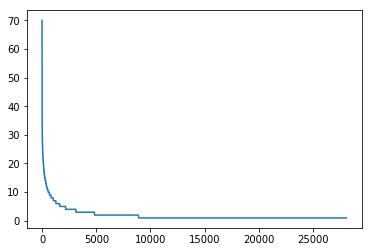

In [37]:
plt.plot(range(len(exh_len)), exh_len) # 횟수1인 작가가 압도적으로 많다

In [38]:
prolifics = sorted_artists[:20]

In [39]:
y = list(map(lambda el:len(el[1]), prolifics)) # 다작 아티스트의 전시 수 
y[0:10]

[70, 52, 48, 45, 42, 40, 38, 38, 36, 36]

In [40]:
x = list(map(lambda el:el[0], prolifics))
x[0:10]

['이이남', '백남준', '이우환', '김종학', '서용선', '김환기', '변대용', '구성연', '이지연', '오용석']

In [42]:
plt.rcParams['font.family'] = 'NanumSquare' #그래프 위한 폰트설정

<Container object of 20 artists>

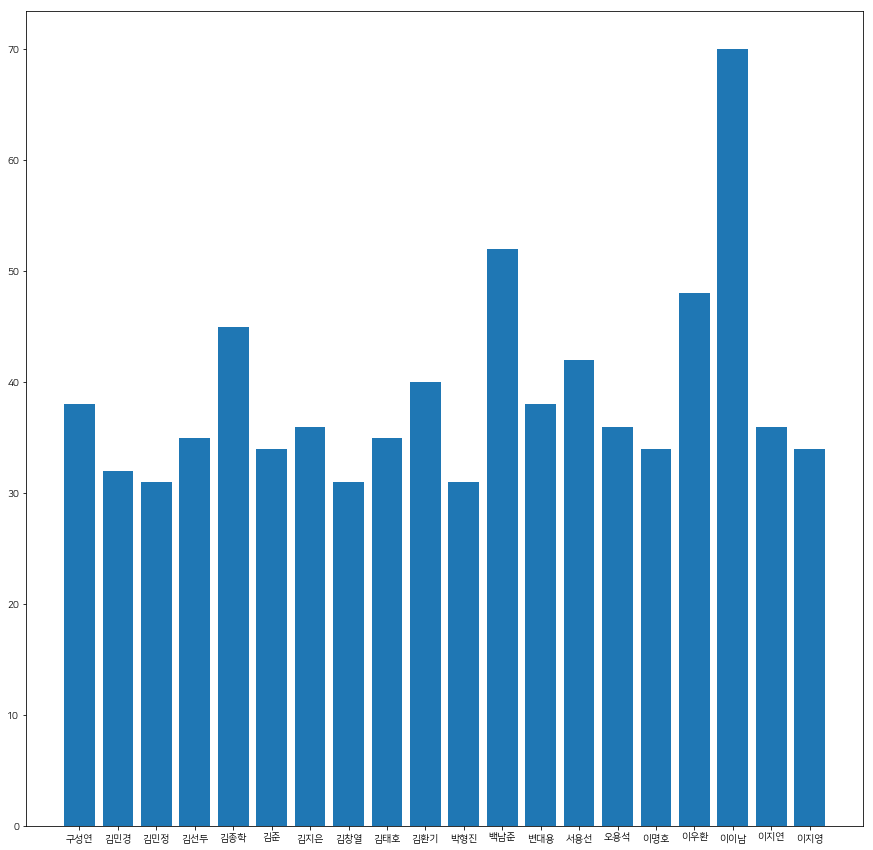

In [43]:
plt.figure(figsize = (15,15))
plt.bar(x,y)

In [44]:
sorted_artists_twice = [artist for artist in sorted_artists if len(artist[1])>1]

In [45]:
len(sorted_artists_twice) # 두번 이상 전시했던  8892명의 작가

8892

In [46]:
sorted_artists_twice[-1]

('김태기',
 ['이번 전시는 2012년에 시작된 1이 필두가 되었으며, 작가로서 새로운 방향성을 모색하고 그 간의 작업을 발표하기 위한 자리로써 마련되었습니다. 2은 마주하고 있는 예술 환경에 대한 보편적 접근 방식에 머무르지 않고, 창작의 주체인 작가들이 모여 각자의 프로세스를 공유하고 토론하는 향유의 장이 되었습니다. 그동안의 에너지가 빚어낸 2은 현대의 예술문화에 대한 질서와 담론을 논의하고, 새로운 시대에 실현될 예술을 조명하는 플랫폼이라 할 수 있습니다. 15명의 작가들이 선보이는 다양한 작업을 통하여 동시대 신진작가들의 감성과 시선, 그리고 그 작품들이 지니고 있는 진정한 의미를 전하고 소통하는 계기가 되기를 기원합니다. 권용무 현대사회에서 생산되어진 기계부속물의 해체와 조합, 확장을 통해 새로운 시각과 의미를 부여한다송여진 현대사회의 광범위한 공간과 범람하는 이미지들 속에서 사람들은 하루하루 일상을 너무나 쉽고 당연한 것으로 흘려보낸다. 하지만 나에게 일상은 익숙한 것이 아닌, 재구성 될 수 있는 가변적이고 특별한 기억의 조합으로 다가왔다. 그렇지만 이것 또한 시간이 지나면 또다시 일상적인 기억이 된다. 이렇게 익숙한 일상이 재구성되어 특별한 순간이 되고, 다시 아무것도 아닌 일상이 되는 순환구조에 집중한다. 김태기 등한시 되거나 일회성에 그친 이미지들을 회화로 환기시켜 매체의 영속성을 부여한다. 검색창에 입력된 오타들은 불규칙한 이미지로 썸네일화 되고, 선택된 대상들은 원전과도 같이 견고한 밑바탕으로 건축된다. 조합한 화면을 다시 용해하는 과정에서 엉겨 붙은 이미지들이 돌연변이로 탈바꿈하게 되는데 이러한 화면에 귀속된 개체의 희생은 작품의 제목으로 연결되는 과 밀접해 있다.배민영 보여짐의 욕망은 끝없이 증식하는 매체와 복잡해져가는 사회 관계망 속에서 부각되고 있다. 멋진 배경에 투영되는 사람들의 심리와 그 것을 통하여 대리 만족으로 향하는 욕망에 대해 이야기 해보고자 한다. 박지영 나에게 있었던 일들, 내가 느끼는 모든 것, 책과 영화의 이야

In [47]:
# with open('sorted_artists_twice_final.lst','wb') as file:
#     pickle.dump(sorted_artists_twice,file)

In [2]:
with open('sorted_artists_twice_final.lst','rb') as file:
    sorted_artists_twice = pickle.load(file)

In [3]:
sorted_artists_corpus= list(map(lambda el:(el[0], '\n'.join(el[1])), sorted_artists_twice))

In [4]:
sorted_artists_corpus[-1]

('김태기',
 '이번 전시는 2012년에 시작된 1이 필두가 되었으며, 작가로서 새로운 방향성을 모색하고 그 간의 작업을 발표하기 위한 자리로써 마련되었습니다. 2은 마주하고 있는 예술 환경에 대한 보편적 접근 방식에 머무르지 않고, 창작의 주체인 작가들이 모여 각자의 프로세스를 공유하고 토론하는 향유의 장이 되었습니다. 그동안의 에너지가 빚어낸 2은 현대의 예술문화에 대한 질서와 담론을 논의하고, 새로운 시대에 실현될 예술을 조명하는 플랫폼이라 할 수 있습니다. 15명의 작가들이 선보이는 다양한 작업을 통하여 동시대 신진작가들의 감성과 시선, 그리고 그 작품들이 지니고 있는 진정한 의미를 전하고 소통하는 계기가 되기를 기원합니다. 권용무 현대사회에서 생산되어진 기계부속물의 해체와 조합, 확장을 통해 새로운 시각과 의미를 부여한다송여진 현대사회의 광범위한 공간과 범람하는 이미지들 속에서 사람들은 하루하루 일상을 너무나 쉽고 당연한 것으로 흘려보낸다. 하지만 나에게 일상은 익숙한 것이 아닌, 재구성 될 수 있는 가변적이고 특별한 기억의 조합으로 다가왔다. 그렇지만 이것 또한 시간이 지나면 또다시 일상적인 기억이 된다. 이렇게 익숙한 일상이 재구성되어 특별한 순간이 되고, 다시 아무것도 아닌 일상이 되는 순환구조에 집중한다. 김태기 등한시 되거나 일회성에 그친 이미지들을 회화로 환기시켜 매체의 영속성을 부여한다. 검색창에 입력된 오타들은 불규칙한 이미지로 썸네일화 되고, 선택된 대상들은 원전과도 같이 견고한 밑바탕으로 건축된다. 조합한 화면을 다시 용해하는 과정에서 엉겨 붙은 이미지들이 돌연변이로 탈바꿈하게 되는데 이러한 화면에 귀속된 개체의 희생은 작품의 제목으로 연결되는 과 밀접해 있다.배민영 보여짐의 욕망은 끝없이 증식하는 매체와 복잡해져가는 사회 관계망 속에서 부각되고 있다. 멋진 배경에 투영되는 사람들의 심리와 그 것을 통하여 대리 만족으로 향하는 욕망에 대해 이야기 해보고자 한다. 박지영 나에게 있었던 일들, 내가 느끼는 모든 것, 책과 영화의 이야기

corpus에서 tokens를 뽑아내자

In [51]:
artists_twice_tokens = []
for artist in tqdm(sorted_artists_corpus):
    tokens = twitter.morphs(artist[1])
    artists_twice_tokens.append( (artist[0],tokens) )

100%|██████████████████████████████████████████████████████████████████████████████| 8892/8892 [19:24<00:00,  7.63it/s]


In [12]:
artists_twice_tokens = []
for tpl in tqdm(sorted_artists_corpus):
    tokens = [tag[0] for tag in twitter.pos(tpl[1]) if tag[1] in ['Noun','Adjective','Adverb','Verb']]
    artists_twice_tokens.append( (tpl[0], tokens) )

100%|██████████████████████████████████████████████████████████████████████████████| 8892/8892 [19:56<00:00,  7.43it/s]


In [7]:
artists_twice_tokens = []
for artist in tqdm(sorted_artists_corpus):
    tokens = twitter.nouns(artist[1])
    artists_twice_tokens.append( (artist[0],tokens) )

100%|██████████████████████████████████████████████████████████████████████████████| 8892/8892 [37:35<00:00,  3.94it/s]


In [53]:
# with open('artists_twice_morphs_final.lst','wb') as file:
#     pickle.dump(artists_twice_tokens,file)

In [15]:
# with open('artists_twice_adnouns_final.lst','wb') as file:
#     pickle.dump(artists_twice_tokens,file)

In [8]:
# with open('artists_twice_nouns_final.lst','wb') as file:
#     pickle.dump(artists_twice_tokens,file)